# Task-02

**A K-means clustering algorithm to group customers of a retail store based on their purchase history.**

In [75]:
# Importatnt Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Dataset Loading

In [76]:
# Load the dataset
dataset= pd.read_csv('/content/Mall_Customers.csv')

# Extracting relevant features
X_cluster = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

Dataset Exploration

In [77]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [79]:
dataset.duplicated().sum()

0

In [80]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Optimal Clusters

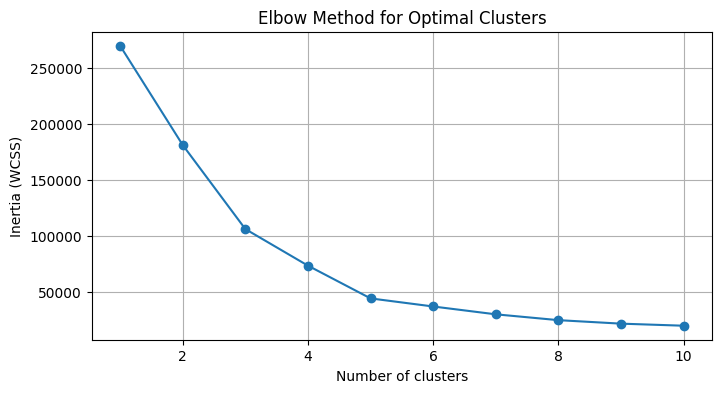

In [81]:
# Using KMeans to find the optimal number of clusters with the Elbow method
num_of_clusters = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_cluster)
    num_of_clusters.append(kmeans.inertia_)

# Plotting the elbow curve to determine the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), num_of_clusters, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

Visualize Result

In [82]:
#Data Scaling
scaler = MinMaxScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)
# Applying KMeans with optimal number of clusters (5 in this case)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_cluster_scaled)

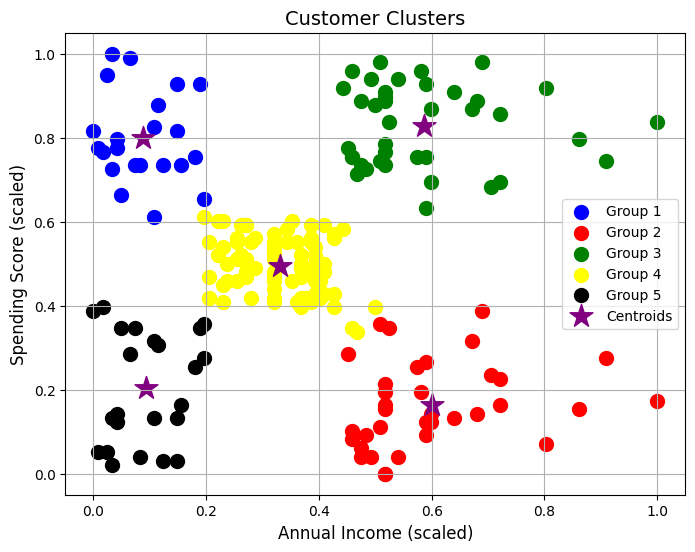

In [83]:
plt.figure(figsize=(8, 6))

#  colors , labels for clusters
cluster_colors = ['blue', 'red', 'green', 'yellow', 'black']
cluster_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

for i in range(5):  # Since we have 5 clusters
    plt.scatter(X_cluster_scaled[y_kmeans == i, 0], X_cluster_scaled[y_kmeans == i, 1],
                s=100, c=cluster_colors[i], label=cluster_labels[i])


# Adding centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='purple', label='Centroids', marker='*')

plt.title('Customer Clusters', fontsize=14)
plt.xlabel('Annual Income (scaled)', fontsize=12)
plt.ylabel('Spending Score (scaled)', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()


Data Processing

In [84]:
print(dataset.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [85]:
# # Adding the cluster labels to the original dataset
y_means = kmeans.labels_
dataset = dataset.assign(Cluster=y_means)
print(dataset.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        0  
2        4  
3        0  
4        4  


In [87]:
# Encoding categorical features
Encoder = LabelEncoder()
dataset['Gender'] = Encoder.fit_transform(dataset['Gender'])

In [88]:
# features (X) and target (y)
X = dataset[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = dataset['Cluster']

Data Splitting

In [89]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Scaling the features using MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [91]:
#  GradientBoostingClassifier and training the model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = gb_classifier.predict(X_test_scaled)


Model Evaluation

In [92]:
# Evaluation Metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [93]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Creating a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Accuracy: 0.97
Precision: 0.99
Recall: 0.93
F1 Score: 0.95
     Actual  Predicted
95        3          3
15        0          0
30        4          4
158       1          1
128       1          1
